# Gain-Managed Nonlinear Amplifier

## Demonstration of nonlinear laser amplifier calculation similar to the results presented in Pavel Sidorenko *et al.* papers <sup>1, 2</sup>

<sup>1</sup> Generation of 1 μJ and 40 fs pulses from a large mode area gain-managed nonlinear amplifier <br> 
Pavel Sidorenko* AND Frank Wise; Optics Letters, Vol. 45, No. 14, 15 July 2020 ;<br>
<sup>2</sup> Nonlinear ultrafast fiber amplifiers beyond the gain-narrowing limit <br> 
Pavel Sidorenko*, Walter Fu, AND Frank Wise; [Optica Vol. 6, No. 10, 2019](https://arxiv.org/pdf/1906.04141.pdf)

A basic simulation model of such nonlinear laser amplifier that is built using : 
- **pyNLO** package<sup>see note</sup> : https://pynlo.readthedocs.io/en/latest/pynlo.html ; https://github.com/pyNLO/PyNLO
- **pyfiberamp** package : https://pyfiberamp.readthedocs.io/en/latest/readme_link.html#download ; https://github.com/Jomiri/pyfiberamp

In [1]:
import sys
import os
import time

from amplifier_para import amplifier_Wise1, amplifier_Wise2
from util.GMNA_Sim import my_pulse, channel_roi_PowerSpectrum
from util.GMNA_Sim import run_amplifier_sim, run_amplifier_and_propagation_sim
from util.GMNA_Plot import plot_linear_AW_AT, plot_log_AW_AT
from util.GMNA_Plot import plot_AW_AT_vs_length, plot_PeakPower_EPP_vs_length

%matplotlib inline

default_stdout = sys.stdout

## 1- This first case is from Pavel Sidorenko *et al*<sup>1</sup> paper where they used the Nufern's active optical fiber PM-YDF-5-130

### Load parameters and look at amplifier behavior without nonlinear pulse propagation

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.07e-01       1.34e-16          20             21       
       2          3.01e-04       0.00e+00          41              1       
       3          7.16e-05       0.00e+00          42              0       
Solved in 3 iterations, number of nodes 42. 
Maximum relative residual: 7.16e-05 
Maximum boundary residual: 0.00e+00


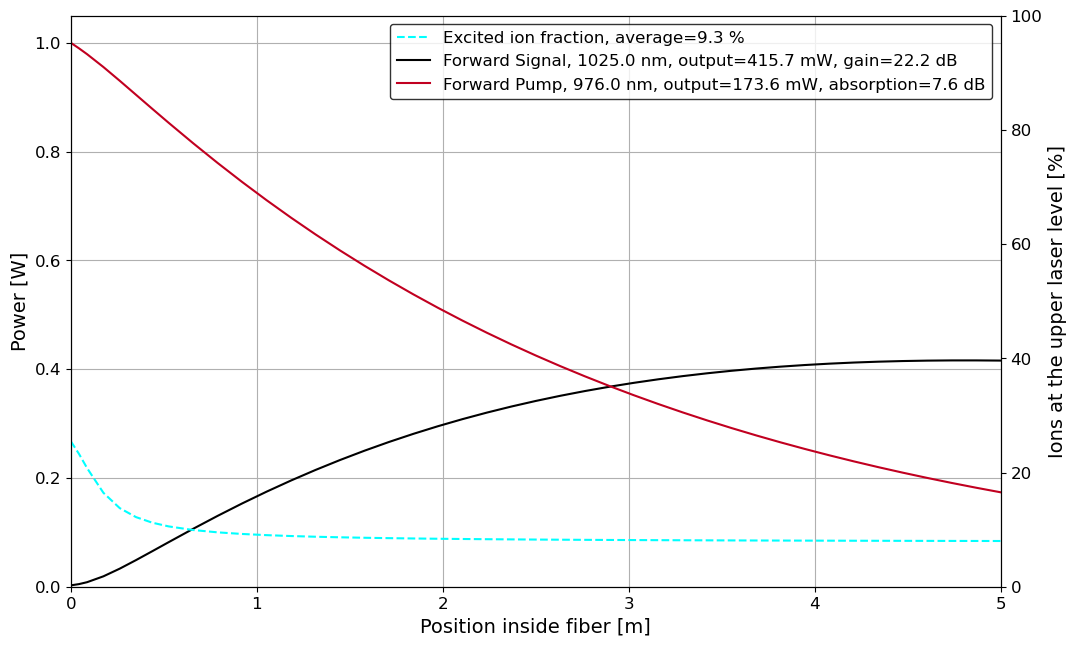

In [2]:
# Load the parameter for this system
amplifier = amplifier_Wise1

# Set laser pulse from provided parameters
pulse_in = my_pulse(amplifier)

# Set signal channel array from pulse parameters
channel_roi_PowerSpectrum(pulse_in, amplifier)

# Run amplifier simulation, without nonlinear propagation
run_amplifier_sim(amplifier)

### Perform laser pulse amplification and nonlinear propagation simulation

In [3]:
# Amplification and nonlinear propagation simulation
nb_section = 50  # Number of segmentation of the active fiber
tic = time.perf_counter()
sys.stdout = open(os.devnull, 'w')
pump_power_evo, signal_power_evo, AW_evo, AT_evo, pulse_out = \
                run_amplifier_and_propagation_sim(pulse_in, amplifier, nb_section)
sys.stdout = default_stdout
toc = time.perf_counter()

print(f"Temps d'exécution = {toc - tic:0.4f} seconds")

# Check if there have been warning for the ROI getting too large
print('\n \n * * * ROI - Warning :', amplifier['spectrum']['roi_warning'], '* * * \n')

# Print output laser pulse characteristics
print(f"\nE = {pulse_out.calc_epp():0.2e} J ; Ps = {pulse_out.calc_epp()*pulse_out.frep_mks:0.2f} W ;",
      f"Pp = {pump_power_evo[-1]:0.2f} W ;  Last nb_of_channel value = {amplifier['channel']['nb_ch']:d}\n")

Temps d'exécution = 35.8349 seconds

 
 * * * ROI - Warning : [] * * * 


E = 7.95e-08 J ; Ps = 0.40 W ; Pp = 0.16 W ;  Last nb_of_channel value = 125



### Various plot of the obtained results

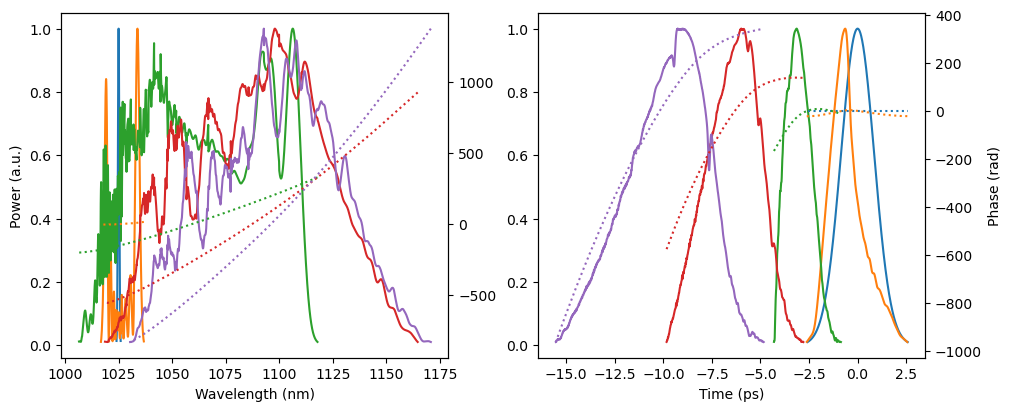

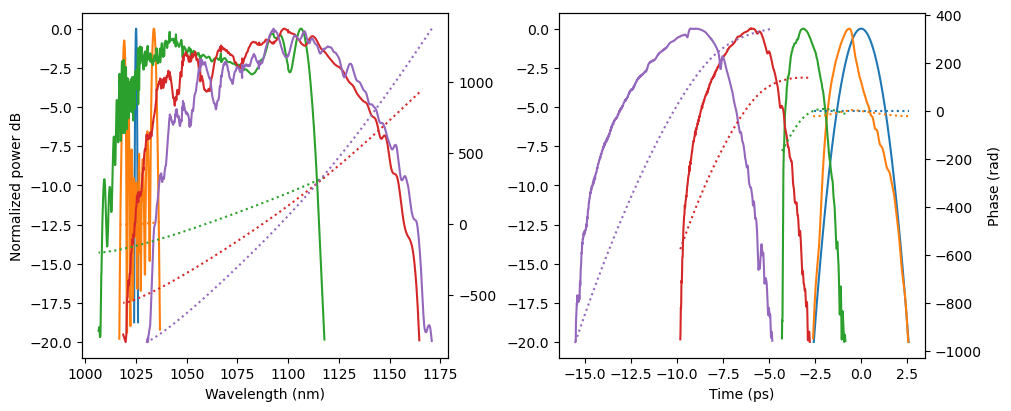

/home/paul/MyPython/Laser/GMNA/GMNA/util/GMNA_Plot.py:102: RuntimeWarning: divide by zero encountered in log10
  zW = np.log10(np.abs(AW[roi]) ** 2) * 10


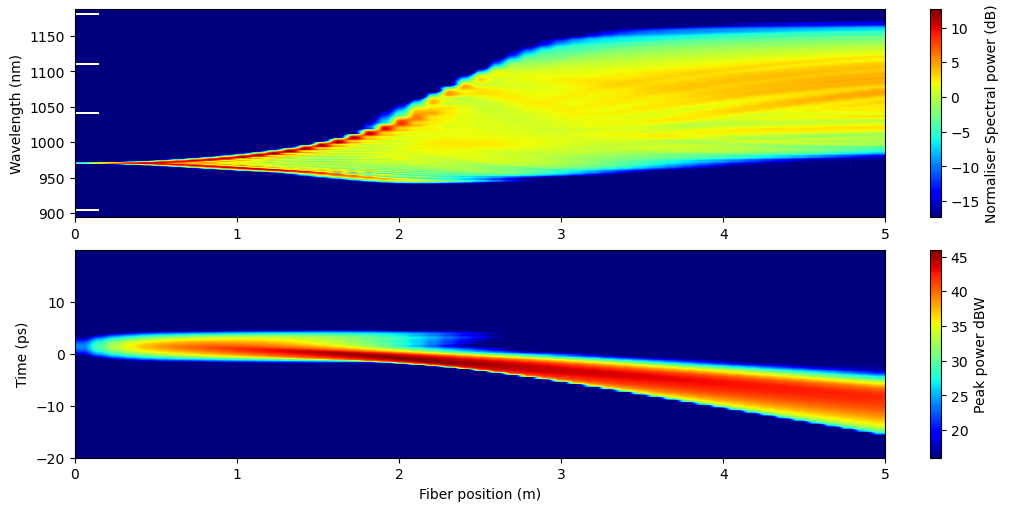

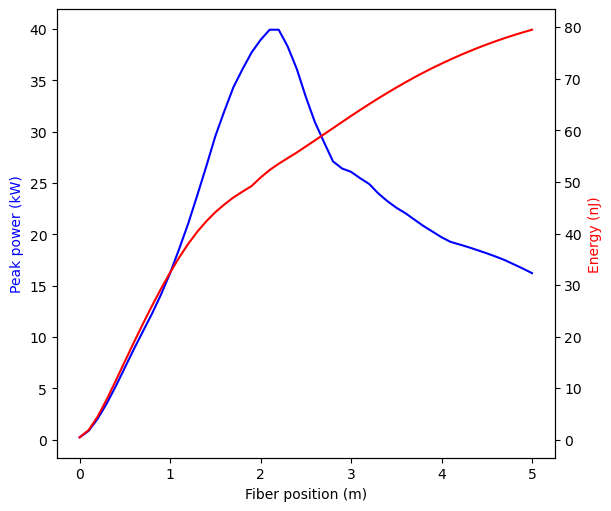

In [4]:
plot_linear_AW_AT(pulse_out, AW_evo, AT_evo, nb_curve=5)   # Linear plot of amplitudes
plot_log_AW_AT(pulse_out, AW_evo, AT_evo, nb_curve=5)
plot_AW_AT_vs_length(pulse_out, AW_evo, AT_evo, amplifier['fiber']['length'], ratio_min=[0.001, 0.001])
plot_PeakPower_EPP_vs_length(pulse_out, AT_evo, amplifier['fiber']['length'])

## 2- Second case is from Pavel Sidorenko *et al*<sup>2</sup> paper where they used the Nufern's active optical fiber PLMA-YDF-30-400

### Load parameters and look at amplifier behavior without nonlinear pulse propagation

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.28e-03       0.00e+00          20             13       
       2          4.28e-04       0.00e+00          33              6       
       3          5.52e-05       0.00e+00          39              0       
Solved in 3 iterations, number of nodes 39. 
Maximum relative residual: 5.52e-05 
Maximum boundary residual: 0.00e+00


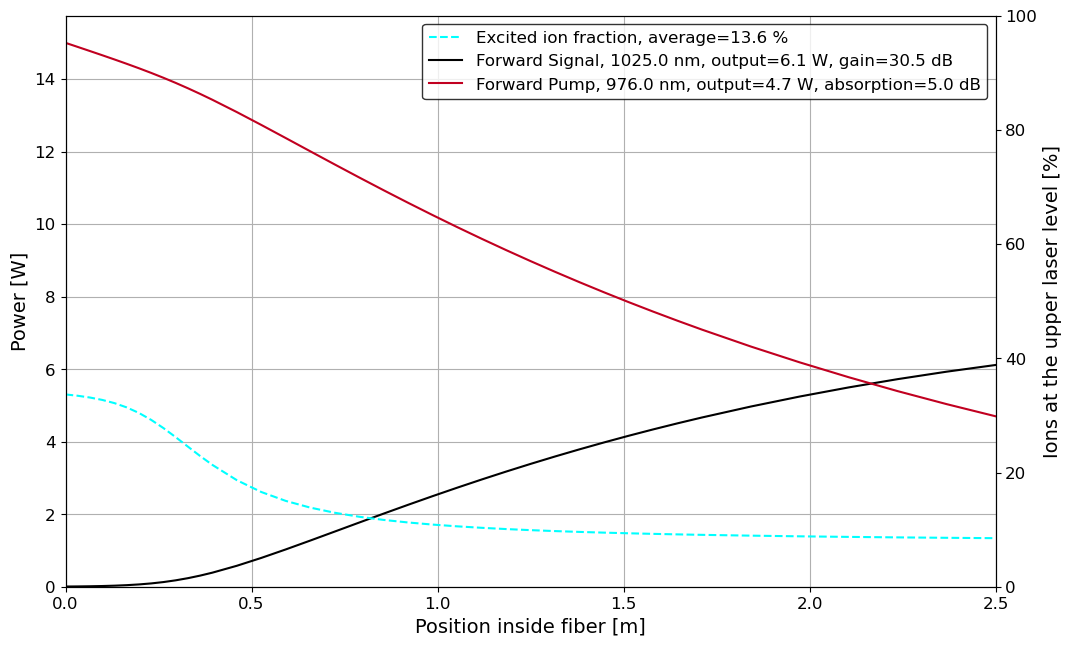

In [5]:
# Load the parameter for this system
amplifier = amplifier_Wise2

# Set laser pulse from provided parameters
pulse_in = my_pulse(amplifier)

# Set signal channel array from pulse parameters
channel_roi_PowerSpectrum(pulse_in, amplifier)

# Run amplifier simulation, without nonlinear propagation
run_amplifier_sim(amplifier)

### Perform laser pulse amplification and nonlinear propagation simulation

In [6]:
# Amplification and nonlinear propagation simulation
nb_section = 50  # Number of segmentation of the active fiber
tic = time.perf_counter()
sys.stdout = open(os.devnull, 'w')
pump_power_evo, signal_power_evo, AW_evo, AT_evo, pulse_out = \
                run_amplifier_and_propagation_sim(pulse_in, amplifier, nb_section)
sys.stdout = default_stdout
toc = time.perf_counter()

print(f"Temps d'exécution = {toc - tic:0.4f} seconds")

# Check if there have been warning for the ROI getting too large
print('\n \n * * * ROI - Warning :', amplifier['spectrum']['roi_warning'], '* * * \n')

# Print output laser pulse characteristics
print(f"\nE = {pulse_out.calc_epp():0.2e} J ; Ps = {pulse_out.calc_epp()*pulse_out.frep_mks:0.2f} W ;",
      f"Pp = {pump_power_evo[-1]:0.2f} W ;  Last nb_of_channel value = {amplifier['channel']['nb_ch']:d}\n")

Temps d'exécution = 59.7694 seconds

 
 * * * ROI - Warning : [] * * * 


E = 8.94e-07 J ; Ps = 4.83 W ; Pp = 4.87 W ;  Last nb_of_channel value = 262



### Various plot of the obtained results

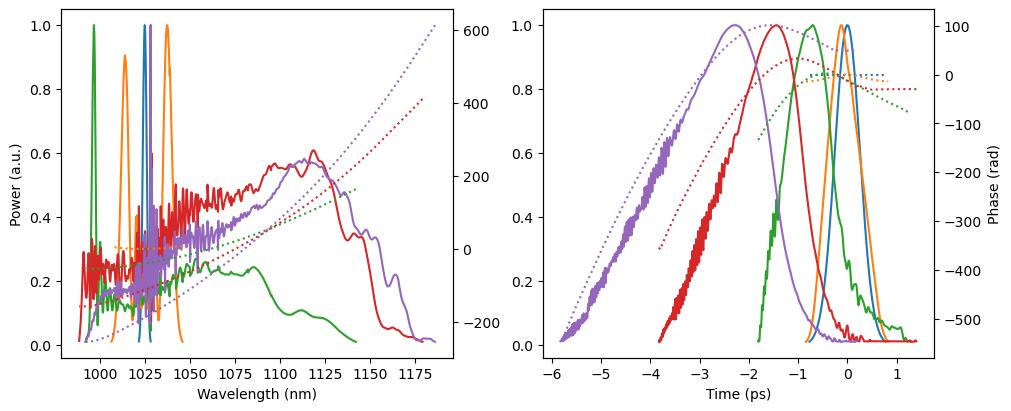

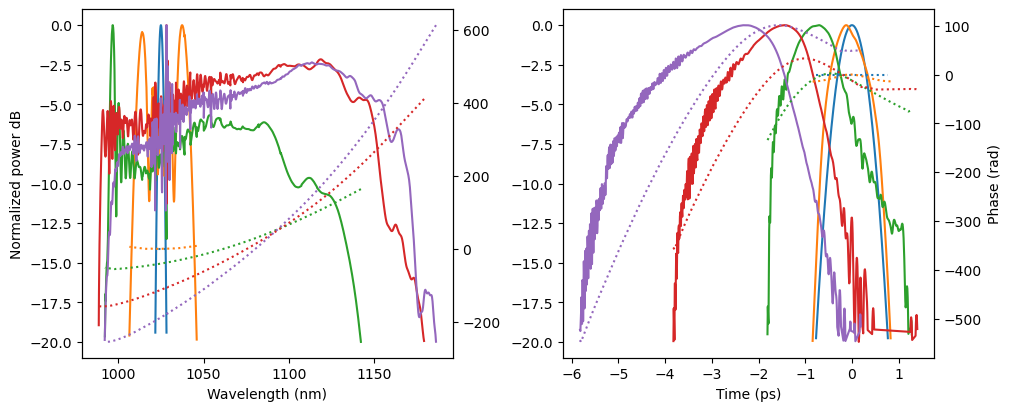

/home/paul/MyPython/Laser/GMNA/GMNA/util/GMNA_Plot.py:102: RuntimeWarning: divide by zero encountered in log10
  zW = np.log10(np.abs(AW[roi]) ** 2) * 10


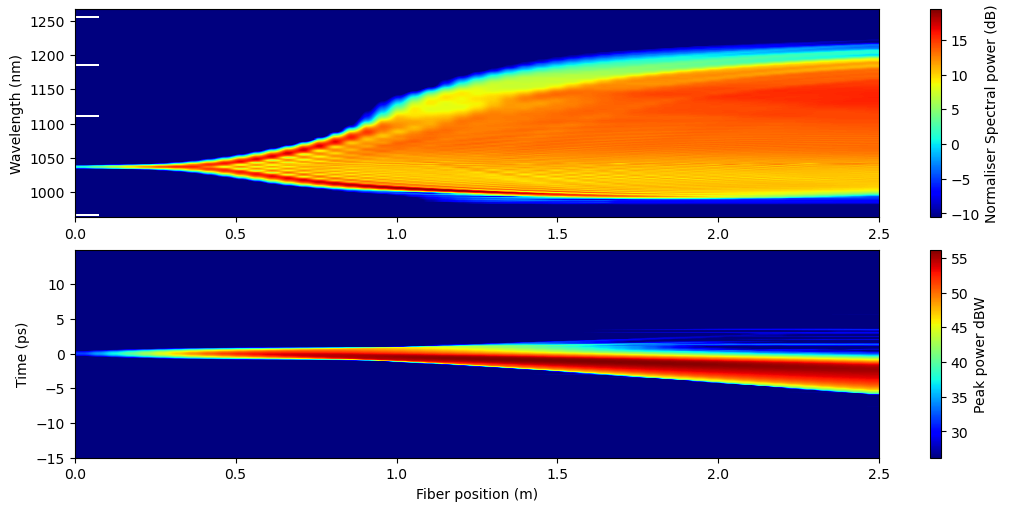

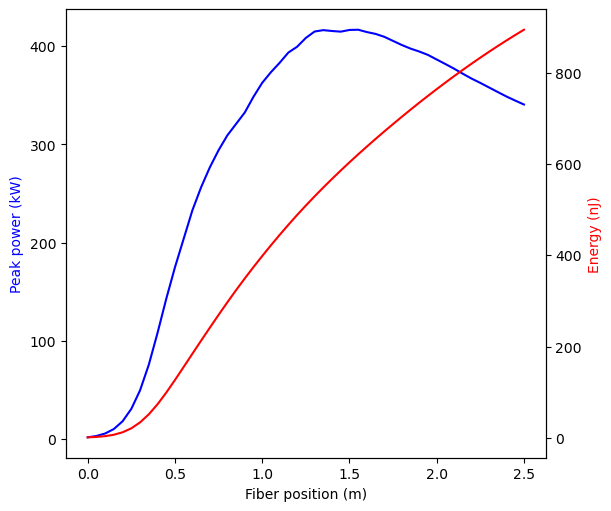

In [7]:
plot_linear_AW_AT(pulse_out, AW_evo, AT_evo, nb_curve=5)   # Linear plot of amplitudes
plot_log_AW_AT(pulse_out, AW_evo, AT_evo, nb_curve=5)
plot_AW_AT_vs_length(pulse_out, AW_evo, AT_evo, amplifier['fiber']['length'], ratio_min=[0.001, 0.001])
plot_PeakPower_EPP_vs_length(pulse_out, AT_evo, amplifier['fiber']['length'])